<a href="https://colab.research.google.com/github/vanhuugiacuong/Dai_So_Tuyen_Tinh/blob/master/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Giới thiệu một số ứng dụng của tích vector (dot product)

In [8]:
import numpy as np

A = np.array([0, 0, -1, 2, 3, -1, 0, 1, -1, -1])
search_vector = np.array([0, 1, -1])

# Kiểm tra chiều dài
print("Chiều dài:", len(A), len(search_vector))  # (10, 3)

# Bước 1: Tạo ma trận B, mỗi hàng là 1 đoạn con độ dài bằng search_vector
B = np.array([A[i:i+len(search_vector)] for i in range(len(A)-len(search_vector)+1)])
print("Ma trận B:\n", B)

# Bước 2: Tính dot product từng hàng với search_vector
C = np.inner(B, search_vector)
print("Vector dot products:\n", C)

# Bước 3: So sánh từng kết quả với giá trị chuẩn
target = np.inner(search_vector, search_vector)
print("Giá trị chuẩn:", target)

# Bước 4: In ra các vị trí trùng khớp
for i in range(len(C)):
    if C[i] == target:
        print(f"Tìm thấy tại vị trí {i}: {B[i]}")

Chiều dài: 10 3
Ma trận B:
 [[ 0  0 -1]
 [ 0 -1  2]
 [-1  2  3]
 [ 2  3 -1]
 [ 3 -1  0]
 [-1  0  1]
 [ 0  1 -1]
 [ 1 -1 -1]]
Vector dot products:
 [ 1 -3 -1  4 -1 -1  2  0]
Giá trị chuẩn: 2
Tìm thấy tại vị trí 6: [ 0  1 -1]


2.1.Đơn giản hóa thuật toán Pagerank

In [7]:
import numpy as np

# Ví dụ ma trận A kích thước 4x4
A = np.array([
    [0.5, 0.2, 0.2, 0.1],
    [0.1, 0.7, 0.1, 0.1],
    [0.2, 0.2, 0.5, 0.1],
    [0.2, 0.1, 0.2, 0.5]
])

# Vector ban đầu x
x = np.array([1.0, 1.0, 1.0, 1.0])

# Lặp 10 lần
for i in range(10):
    x = np.dot(A, x)
    print(f"Lần {i+1}: {x}")

Lần 1: [1. 1. 1. 1.]
Lần 2: [1. 1. 1. 1.]
Lần 3: [1. 1. 1. 1.]
Lần 4: [1. 1. 1. 1.]
Lần 5: [1. 1. 1. 1.]
Lần 6: [1. 1. 1. 1.]
Lần 7: [1. 1. 1. 1.]
Lần 8: [1. 1. 1. 1.]
Lần 9: [1. 1. 1. 1.]
Lần 10: [1. 1. 1. 1.]


2.2. [Đọc thêm] Xử lý dangling node trong thuật toán Pagerank

In [6]:
import numpy as np

x = np.array([1.0, 1.0, 1.0, 1.0])
A = np.array([
    [0,     0,     1.0/2, 1/4.0],
    [1.0/3, 0,     0,     1/4.0],
    [1.0/3, 0,     0,     1/4.0],
    [1.0/3, 1.0,   1.0/2, 1/4.0]
])

for i in range(7):
    x = np.dot(A, x)
    print(f"{i+1}: {x}")

1: [0.75       0.58333333 0.58333333 2.08333333]
2: [0.8125     0.77083333 0.77083333 1.64583333]
3: [0.796875   0.68229167 0.68229167 1.83854167]
4: [0.80078125 0.72526042 0.72526042 1.74869792]
5: [0.79980469 0.70410156 0.70410156 1.79199219]
6: [0.80004883 0.71459961 0.71459961 1.77075195]
7: [0.79998779 0.70937093 0.70937093 1.78127035]


2.3. [Đọc thêm] Xử lý nhánh web reducible

In [5]:
import numpy as np

A = np.array([
    [0.0,   0.0,   1/2.0, 0.0,   0.0, 0.0, 0.0, 0.0],
    [1/3.0, 0.0,   1/2.0, 0.0,   0.0, 0.0, 0.0, 0.0],
    [1/3.0, 0.0,   0.0,   0.0,   0.0, 0.0, 0.0, 0.0],
    [1/3.0, 1/2.0, 1/2.0, 0.0,   0.0, 0.0, 0.0, 0.0],
    [0.0,   1/2.0, 0.0,   0.0,   0.0, 1/2.0, 0.0, 0.0],
    [0.0,   0.0,   0.0,   0.0,   0.0, 0.0,   1.0, 1/2.0],
    [0.0,   0.0,   0.0,   1/2.0, 1.0, 0.0,   0.0, 1/2.0],
    [0.0,   0.0,   0.0,   0.0,   0.0, 1/2.0, 0.0, 0.0]
])

d = 0.85
N = 8
x = np.array([1.0/N] * N)

# Tạo ma trận ngẫu nhiên hiệu chỉnh M:
M = d * A + ((1 - d) / N) * np.ones((N, N))

for i in range(7):
    x = np.dot(M, x)
    print(f"{i+1}: {x}")

1: [0.071875   0.10729167 0.05416667 0.16041667 0.125      0.178125
 0.23125    0.071875  ]
2: [0.04177083 0.06213542 0.03911458 0.10773437 0.14005208 0.24585938
 0.22372396 0.09445312]
3: [0.03452702 0.04636209 0.02973839 0.07276964 0.14880111 0.24821126
 0.22287728 0.12239355]
4: [0.02999532 0.03977798 0.02713916 0.05948186 0.14255018 0.25881945
 0.2267818  0.12284629]
5: [0.02854774 0.03704642 0.02551228 0.05395206 0.14391751 0.26198781
 0.21567072 0.12701187]
6: [0.02759859 0.03568711 0.0248444  0.05143184 0.14384542 0.25405603
 0.21599542 0.12810069]
7: [0.02708811 0.03490771 0.02434884 0.05007473 0.13967008 0.25456814
 0.21509917 0.12450305]


BÀI TẬP CHƯƠNG 7

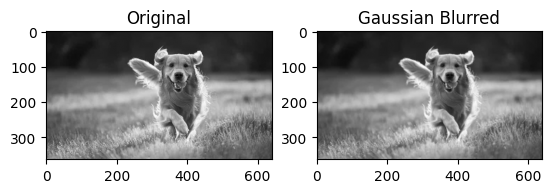

In [9]:
# Câu 1: Làm mờ bằng Gaussian Kernel

import cv2
import numpy as np
from matplotlib import pyplot as plt
import urllib.request

# Download a sample image
url = 'https://images.theconversation.com/files/625049/original/file-20241010-15-95v3ha.jpg?ixlib=rb-4.1.0&rect=4%2C12%2C2679%2C1521&q=20&auto=format&w=320&fit=clip&dpr=2&usm=12&cs=strip'
file_name = 'sample_puppy.jpg'
urllib.request.urlretrieve(url, file_name)

# Đọc ảnh grayscale
img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# Gaussian kernel (3x3)
gaussian_kernel = (1/16) * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

# Áp dụng Gaussian blur bằng filter2D
blurred = cv2.filter2D(img, -1, gaussian_kernel)

# Hiển thị kết quả
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(blurred, cmap='gray'), plt.title('Gaussian Blurred')
plt.show()


#  Câu 2: Phương pháp “rút xương” (Edge detection)
kernel_a = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])